<a href="https://colab.research.google.com/github/charan-sai-vignesh/hyperspectral/blob/main/hyperspectral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.download('/content/hyperspectral_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_csv('/content/hyperspectral_data.csv')

# print(df.info())
df.describe()


,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64


In [6]:
# Drop missing values (or use imputation)
df.dropna(inplace=True)

In [7]:
X = df.drop(columns=['vomitoxin_ppb'])
y = df['vomitoxin_ppb']




In [8]:
X

,hsi_id,0,1,2,3,4,5,6,7,8,...,438,439,440,441,442,443,444,445,446,447
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


In [9]:

from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X = X.drop(columns=['hsi_id'])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 400
Testing samples: 100


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
X1 = df.drop(columns=['hsi_id', 'vomitoxin_ppb'])

In [14]:
X1

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


In [15]:
X1['1'].mean()

0.44076102436796966

In [16]:
columns = X1.columns

In [17]:
len(columns)

448

In [18]:
avg_list = []

In [19]:
for i in range(0, len(columns)):
  avg_list.append(X1[columns[i]].mean())

In [20]:
avg_list

[0.44311787868022046,
 0.44076102436796966,
 0.43381398030194485,
 0.4261218744519686,
 0.41899003436105997,
 0.4124318695250887,
 0.4058684208581143,
 0.39981525411367247,
 0.39403814194264286,
 0.38966376654528234,
 0.3861097970307831,
 0.381634734947541,
 0.3786053735653553,
 0.3760001447747592,
 0.3732738500135297,
 0.3716649847280796,
 0.36976931836257554,
 0.3686516696569094,
 0.36424209946686104,
 0.36318099221245276,
 0.3612067857040679,
 0.3597780985409771,
 0.358114507195633,
 0.3550968673432544,
 0.3529899070153614,
 0.3494632906029424,
 0.3481384429135306,
 0.3465186105499345,
 0.34328612077378856,
 0.3427921385021559,
 0.3405791719920185,
 0.33810642988678263,
 0.3366866993046061,
 0.33533247541762823,
 0.33418446624934883,
 0.3322526773495889,
 0.3307763232924103,
 0.32845170277476393,
 0.32768686000997455,
 0.3263974756771055,
 0.3253713582813358,
 0.32399256753118605,
 0.3226742656138539,
 0.3228899382645013,
 0.32210728546793266,
 0.32315893867940765,
 0.32308581860136

In [21]:
X1 = np.concatenate((X1, np.array(avg_list).reshape(1, -1)), axis=0)

In [22]:
new_list=[]
for i in range(0, 448):
  new_list.append(i)

In [23]:
new_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [24]:
wavelength_bands = np.array(new_list)
avg_values = np.array(avg_list)

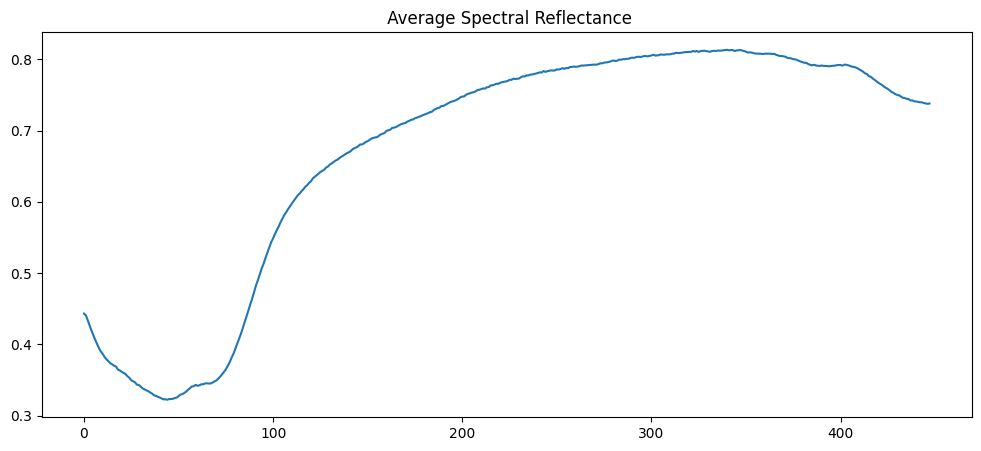

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(wavelength_bands, avg_values)
plt.title(" Average Spectral Reflectance")
plt.show()

HEAT MAP

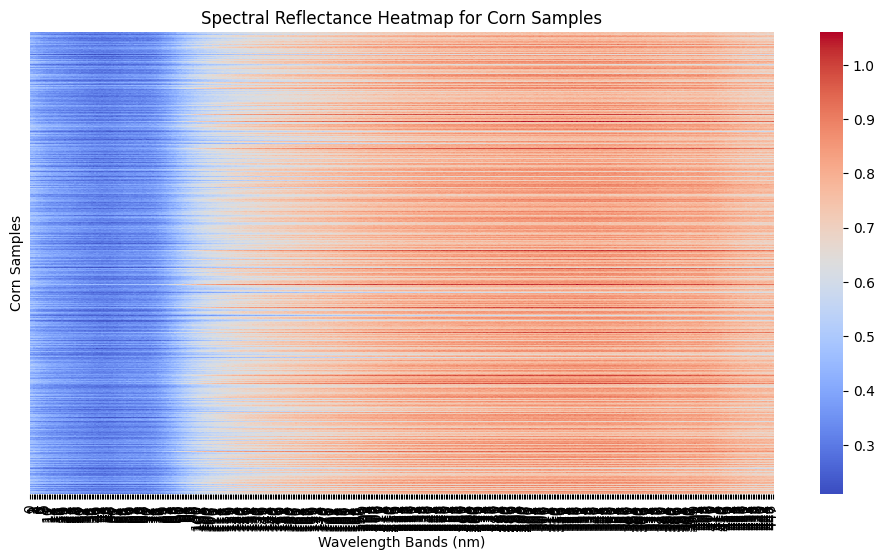

In [26]:
wavelength_bands = np.array(new_list)
spectral_data = df[wavelength_bands.astype(str)]
plt.figure(figsize=(12, 6))
sns.heatmap(spectral_data, cmap="coolwarm", xticklabels=wavelength_bands, yticklabels=False)
plt.xlabel("Wavelength Bands (nm)")
plt.ylabel("Corn Samples")
plt.title("Spectral Reflectance Heatmap for Corn Samples")
plt.show()

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

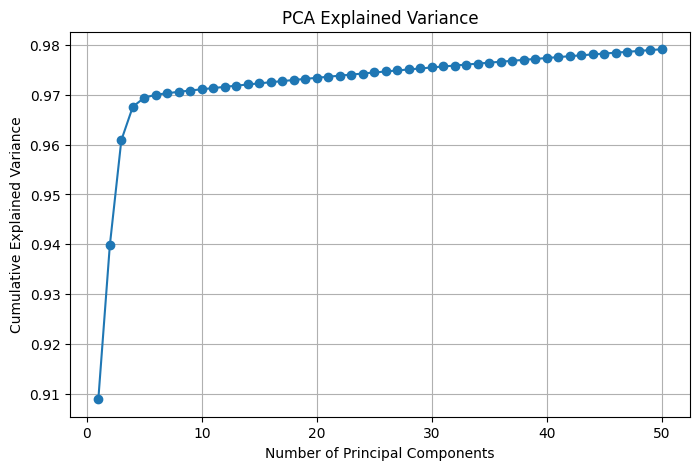

In [28]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()

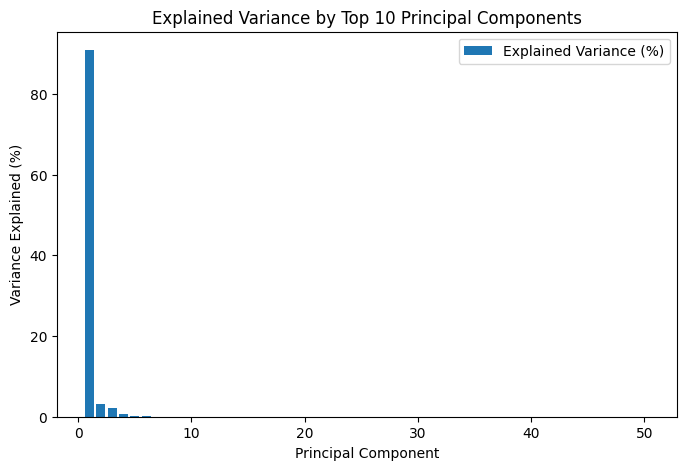

In [29]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, label="Explained Variance (%)")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained (%)")
plt.title("Explained Variance by Top 10 Principal Components")
plt.legend()
plt.show()

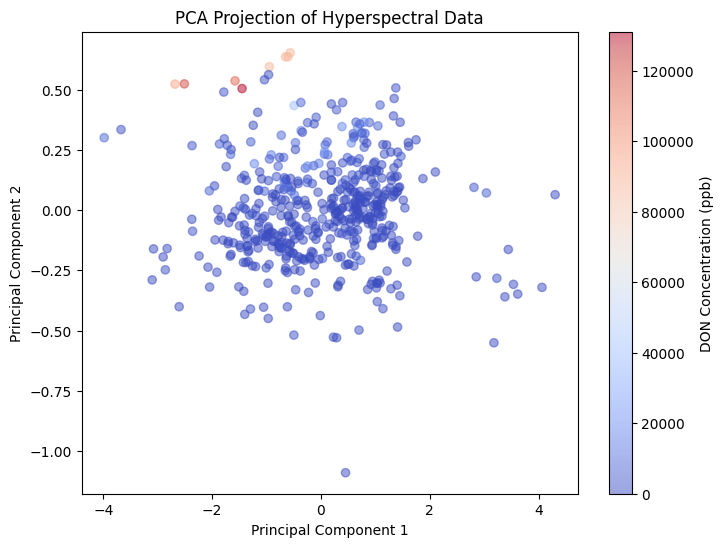

In [30]:
pca_result = pca.fit_transform(X)
pca_2d = pca_result[:, :2]

# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], alpha=0.5, c=df["vomitoxin_ppb"], cmap="coolwarm")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Hyperspectral Data")
plt.colorbar(label="DON Concentration (ppb)")
plt.show()

**MODEL** **TRAINING**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 448), (100, 448), (400,), (100,))

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

y_class = pd.cut(y, bins=[-float("inf"),0, 500, 2000, float("inf")], labels=[-1,0, 1, 2], include_lowest=True, duplicates='drop')


X_train_pca, X_test_pca, y_train_class, y_test_class = train_test_split(
    X_pca, y_class, test_size=0.2, random_state=42
)

train_nan_mask = y_train_class.notna()
test_nan_mask = y_test_class.notna()

X_train_pca = X_train_pca[train_nan_mask]
y_train_class = y_train_class[train_nan_mask]

X_test_pca = X_test_pca[test_nan_mask]
y_test_class = y_test_class[test_nan_mask]

print("NaN values in y_train_class:", y_train_class.isna().sum())


rf_clf = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
rf_clf.fit(X_train_pca, y_train_class)


y_pred_class = rf_clf.predict(X_test_pca)

accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='weighted')
recall = recall_score(y_test_class, y_pred_class, average='weighted')
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

NaN values in y_train_class: 0
Accuracy: 0.53
Precision: 0.58
Recall: 0.53
F1 Score: 0.42


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

y_pred_reg = rf_clf.predict(X_test_pca)

mae = mean_absolute_error(y_test, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
r2 = r2_score(y_test, y_pred_reg)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")




Mean Absolute Error (MAE): 4412.58
Root Mean Squared Error (RMSE): 17291.37
R² Score: -0.07


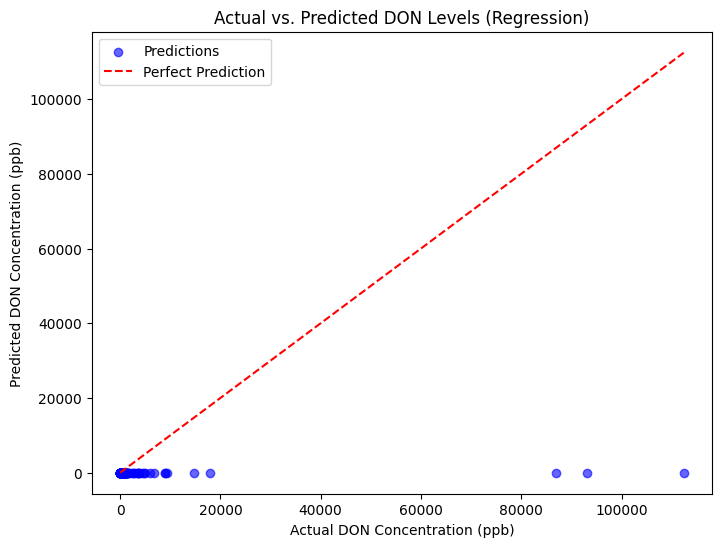

In [34]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg, alpha=0.6, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel("Actual DON Concentration (ppb)")
plt.ylabel("Predicted DON Concentration (ppb)")
plt.title("Actual vs. Predicted DON Levels (Regression)")
plt.legend()
plt.show()